# ANN MNIST

## Load Packages

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [10]:
# load train data
train_dataset = torchvision.datasets.MNIST(
    root='data/',
    train=True, # Will return the train dataset
    transform=transforms.ToTensor(), #preprocessing 
    download=True
)

In [11]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [12]:
train_dataset.data.max() # should be 255

tensor(255, dtype=torch.uint8)

In [13]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [14]:
# check tragets
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [15]:
train_dataset.targets.shape

torch.Size([60000])

In [16]:
# Load test
test_dataset = torchvision.datasets.MNIST(
    root='data/',
    train=False, # Will return the train dataset
    transform=transforms.ToTensor(), #preprocessing 
    download=True
)

In [19]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

## Build Model

In [20]:
# Build model
model = nn.Sequential(
    nn.Linear(784,128), #flatten 28X28 and 128 neurons
    nn.ReLU(),
    nn.Linear(128,10) #128 inputs from previous layer and 10 classes
) # no need for final softmax, we will combine that with the loss function

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # check if GPU is available
print(device)
model.to(device) # transfer the model parameters and data to the GPU (or RAM in case of CPU)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [22]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() #combines the softmax
optimizer = torch.optim.Adam(model.parameters())

In [23]:
# Data loaders
# Generators that will generate batches for the training loop and takes care of shuffling

batch_size=128

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=batch_size,
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=batch_size,
                                            shuffle=False)

## Train

In [25]:
n_epochs = 10

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    train_loss = [] # this will store loss per batch
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device) # move data to GPU

        #reshape data
        #convert to 2D NxD where N is the batch size and D is the features 
        inputs = inputs.view(-1,784) 

        optimizer.zero_grad()

        #forward pass
        outputs = model(inputs)
        loss = criterion(outputs,targets)

        # backward pass and optimize
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item()) # this will loss of the batch

    #get train and test loss
    train_loss=np.mean(train_loss) # The mean can represent the loss for the epoch

    test_loss = []
    for inputs,targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device) # move data to GPU
        #reshape data
        #convert to 2D NxD where N is the batch size and D is the features 
        inputs = inputs.view(-1,784) 

        outputs = model(inputs)
        loss = criterion(outputs,targets)
        test_loss.append(loss.item()) # this will loss of the batch

    test_loss=np.mean(test_loss) # The mean can represent the loss for the epoch

    # save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')






Epoch 1/10, Train Loss: 0.1934, Test Loss: 0.1582
Epoch 2/10, Train Loss: 0.1414, Test Loss: 0.1295
Epoch 3/10, Train Loss: 0.1110, Test Loss: 0.1092
Epoch 4/10, Train Loss: 0.0896, Test Loss: 0.0949
Epoch 5/10, Train Loss: 0.0754, Test Loss: 0.0876
Epoch 6/10, Train Loss: 0.0639, Test Loss: 0.0832
Epoch 7/10, Train Loss: 0.0535, Test Loss: 0.0819
Epoch 8/10, Train Loss: 0.0466, Test Loss: 0.0789
Epoch 9/10, Train Loss: 0.0399, Test Loss: 0.0742
Epoch 10/10, Train Loss: 0.0342, Test Loss: 0.0755


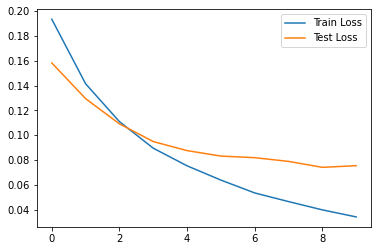

In [26]:
# Plot loss
plt.plot(train_losses, label= "Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend();

In [27]:
# Calculate Train Accuracy
n_correct = 0.
n_total = 0.
for inputs,targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device) # move data to GPU
    # reshape the input
    inputs = inputs.view(-1, 784)
    
    # Forward pass
    outputs = model(inputs)

    # Get predictions
    # Since these are logits, get max
    # torch.max() returns both max and argmax
    # retunes the max vale and the corrosponding index. We only want the index
    _, predictions = torch.max(outputs, 1) 

    #update counts 
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct/n_total

# Calculate test accuracy
n_correct = 0.
n_total = 0.
for inputs,targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device) # move data to GPU
    # reshape the input
    inputs = inputs.view(-1, 784)
    
    # Forward pass
    outputs = model(inputs)

    # Get predictions
    # Since these are logits, get max
    # torch.max() returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    #update counts 
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct/n_total

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9931, Test acc: 0.9779


In [29]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

Confusion matrix, without normalization
[[ 965    0    2    2    2    1    0    2    4    2]
 [   0 1120    4    1    0    1    2    1    6    0]
 [   2    0 1017    3    3    0    2    2    3    0]
 [   0    0    5  990    0    1    0    4    4    6]
 [   1    0    3    0  964    0    4    2    0    8]
 [   2    0    0   13    1  864    4    0    7    1]
 [   6    3    3    1    5    2  937    0    1    0]
 [   1    2    9    4    3    1    0  999    2    7]
 [   5    0    5    7    5    2    1    2  945    2]
 [   2    3    0    6   10    3    0    4    3  978]]


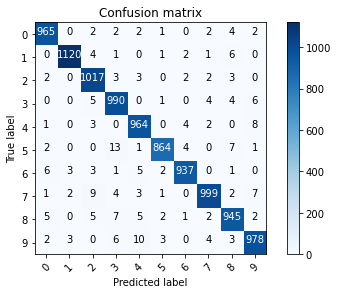

In [30]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs = inputs.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

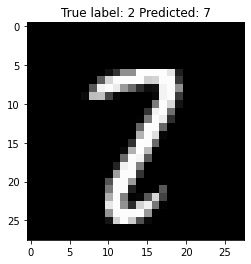

In [37]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])));